# 6.5: Unsupervised Machine Learning: Clustering

### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. The elbow technique
#### 3. k-means clustering

# Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/kerimzengin/Desktop/Data Analytics/Data Analytics Immersion/Achievement 6 - Advanced Analytics & Dashboard Design'

In [4]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'bank_cleaned_2.pkl'))

In [5]:
df.shape

(41188, 21)

In [6]:
df.head()

,age,job,marital,country,education,has_default_loan,has_housing_loan,has_personal_loan,contact_type,month/year,...,campaign,num_of_days_last_contact,num_of_contacts_before_campaign,previous_campaign_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees,has_term_deposit
0,56,housemaid,married,spain,basic.4y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,estonia,high.school,unknown,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.133,5191.0,no
2,37,services,married,austria,high.school,no,yes,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,lithuania,basic.6y,no,no,no,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,2.132,5191.0,no
4,56,services,married,slovakia,high.school,no,no,yes,telephone,2018-05,...,1,999,0,nonexistent,1.1,93.994,-36.4,3.579,5191.0,no


# Data Preprocessing

In [7]:
df.drop(['job', 'marital', 'country', 'education', 'has_default_loan', 'has_housing_loan', 'has_personal_loan', 'contact_type', 'month/year', 'previous_campaign_outcome', 'has_term_deposit'], axis = 1, inplace = True)

In [8]:
df.shape

(41188, 10)

In [9]:
df.head()

,age,duration,campaign,num_of_days_last_contact,num_of_contacts_before_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,2.133,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,2.132,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,3.579,5191.0


# The Elbow Technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4428636878.197794,
 -2735198553.41662,
 -1320781174.4473512,
 -850802185.2673844,
 -642340379.8140684,
 -531358434.89253646,
 -440079611.02225906,
 -376744313.61713934,
 -326056397.52275103]

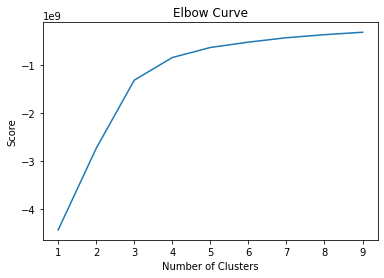

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Based on the graph, it shows the curve flattering after 4 on the x-axis, so this would be considered the optimal number for my clusters**

# K-Means Clustering

In [13]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [14]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [15]:
df['clusters'] = kmeans.fit_predict(df)

/Users/kerimzengin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [16]:
#Check if the cluster column was created

df.head()

,age,duration,campaign,num_of_days_last_contact,num_of_contacts_before_campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor_3_mths,num_of_employees,clusters
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,2.133,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,2.132,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,3.579,5191.0,0


In [17]:
#Checking the frequency counts for each cluster

df['clusters'].value_counts()

0    29406
3     8698
1     1582
2     1502
Name: clusters, dtype: int64

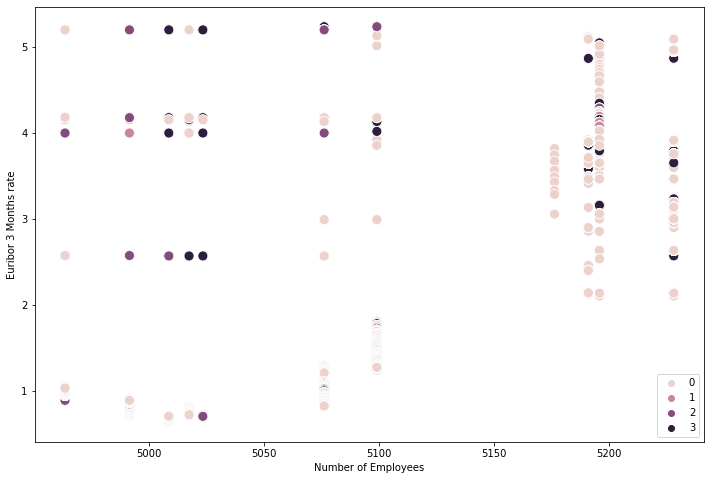

In [18]:
# Plot the clusters for the "Number of Employees" and "Euribor 3 Months" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['num_of_employees'], y=df['euribor_3_mths'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Employees') # Label x-axis.
plt.ylabel('Euribor 3 Months rate') # Label y-axis.
plt.show()

This graph shows most calls were made in countries that had the Interest Rate between 2% and 5% and when the banks employeed more staff.

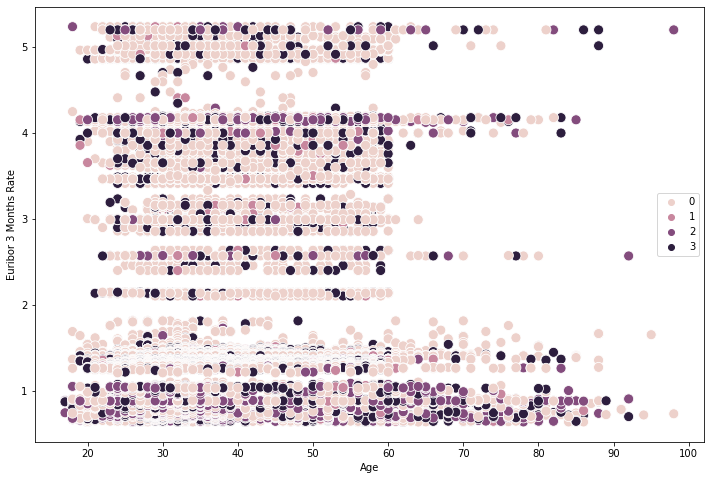

In [19]:
# Plot the clusters for the "Age" and "Euribor 3 Months" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['age'], y=df['euribor_3_mths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Age') 
plt.ylabel('Euribor 3 Months Rate') 
plt.show()

Here we can see that for all clusters, most of the calls were with clients between 20 and 60 years old where the Euribor Interest Rate was at 2 - 5%, except for **Cluster 2** where calls were up to 87 years old where the Interest Rate is up to around 1%

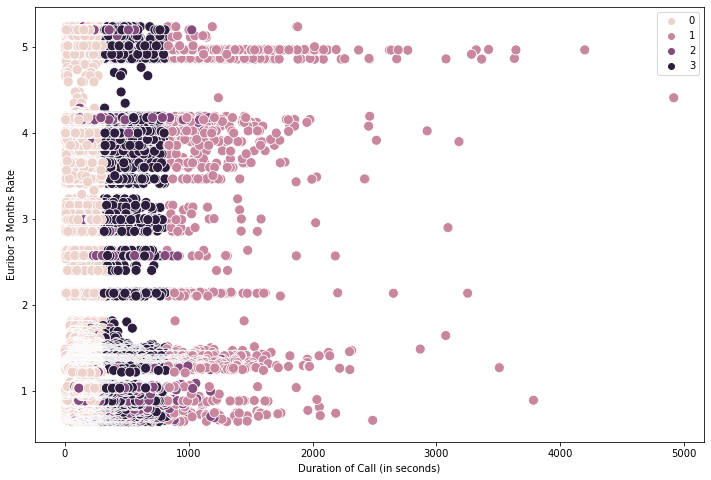

In [20]:
# Plot the clusters for the "Duration" and "Euribor 3 Months" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['duration'], y=df['euribor_3_mths'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Duration of Call (in seconds)') 
plt.ylabel('Euribor 3 Months Rate') 
plt.show()

In this graph, **Cluster 0, 2 & 3** all have the shortest call duration amount, all under 1000 seconds long. Where as **Cluster 1**'s majority of calls were more than 1000 seconds.

Interestingly most of the data points for all clusters are around the 4 mark, could this be when a lot of employees were employeed at the banks?

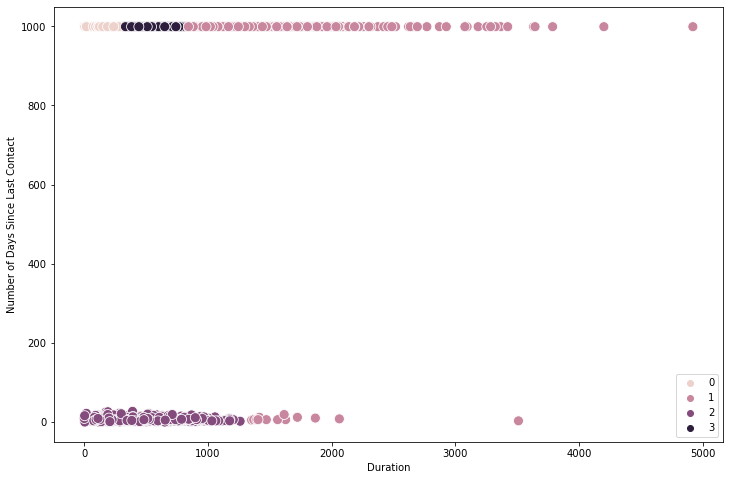

In [21]:
# Plot the clusters for the "Duration" and "Number of days Since Last Contact" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['duration'], y=df['num_of_days_last_contact'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Duration') 
plt.ylabel('Number of Days Since Last Contact') 
plt.show()

In this graph it looks like **Cluster 2** mostly have had shorter call durations during the campaign and with clients who they have spoken with with no long gaps in the days since they last spoke on the phone. 

Besides some data points for **Cluster 1** showing some of the clients have been spoke to before, most of the data points have been first time clients (999 in the data represents never been called before) but with longer call durations compared with **Cluster 2**

**Clusters 0 & 3** are all first time contacted clients, both having shorter call durations. It would need to be further analysed whether these calls were successful/unsuccessful in subscribing to a term deposit.

In [22]:
#Labelling each cluster according to their colour coding

df.loc[df['clusters'] == 3, 'cluster'] = 'Black'
df.loc[df['clusters'] == 2, 'cluster'] = 'Purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'Pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'Light Pink'

In [23]:
#Creating the mean and median for each variable used within the cluster and grouped them by cluster

df.groupby('cluster').agg({'num_of_employees':['mean', 'median'], 
                         'euribor_3_mths':['mean', 'median'], 
                         'duration':['mean', 'median'],
                          'age':['mean', 'median'],
                          'num_of_days_last_contact':['mean', 'median']})

num_of_employees         euribor_3_mths            duration  \
                       mean  median           mean median         mean   
cluster                                                                  
Black           5165.788549  5191.0       3.457100  4.120   473.838009   
Light Pink      5174.112848  5195.8       3.585640  4.175   142.756342   
Pink            5173.126233  5195.8       3.615407  4.406  1172.082807   
Purple          5029.293076  5017.5       1.336140  0.883   309.368842   

                          age        num_of_days_last_contact         
            median       mean median                     mean median  
cluster                                                               
Black        436.0  40.074960   38.0               999.000000  999.0  
Light Pink   135.0  39.929640   38.0               999.000000  999.0  
Pink        1061.5  39.743363   38.0               990.857143  999.0  
Purple       252.0  41.873502   37.0                 5.996671    6.0

The **Purple Cluster** shows to have better repeated calls with their clients compared to the other clusters, as they average about 5 days since last contact with a client. Here also the average Euribor Interest Rate is at 1.33% so I would assume that these are coming from smaller countries were the interest rate is at a lower percentage.

For the **Pink Cluster** they are on average having longer calls at 1172 seconds (approx 20 mins), where the average Interest Rate percentage is at 3.61%.

The **Light Pink Cluster** have the lowest average of call durations at 142 seconds (approx 3 mins), and with first time contacted clients but also where the average number of employees are the highest among other clusters, so I would assume that clients are not so eager to talk on the phone regarding subscribing to a term deposit.

• So perhaps the bigger countries are finding it more difficult to speak with clients again regarding subscribing to a term deposit, which would make this more unlikely for them to subscribe?. This would need to be further investigated to understand if this is the case and why?

• It would be good to understand from the staff why some of those calls are taking longer for the countries where the interest rate is lower?